In [5]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(ngram_range = (2,2))
v.fit(['Thor Hathodawala is looking for a job'])
v.vocabulary_

{'thor hathodawala': 4,
 'hathodawala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [6]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [21]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []

    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)


In [22]:
preprocess("Thor ate pizza")

'thor eat pizza'

In [23]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [24]:
corpus_processed = [preprocess(text) for text in corpus]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [26]:
v = CountVectorizer(ngram_range = (1,2))
# 1,2 means first single token then pair of tokens
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [27]:
v.transform(["Thor eat pizza"]).toarray()
# 1 for matches

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

In [29]:
v.transform(['Hulk eat pizza']).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

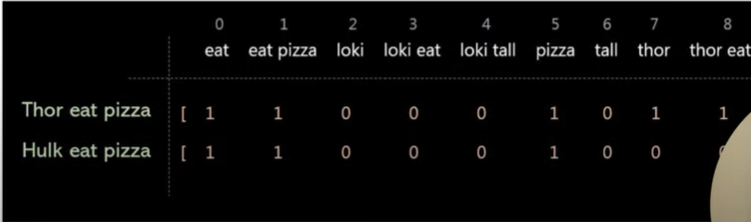

In [31]:
from IPython.display import Image

# Use raw string (prefix with 'r') to handle backslashes
Image(r"C:\Users\hp\OneDrive - National University of Sciences & Technology\Desktop\real.png")


In [32]:
# news_detection
import pandas as pd
df = pd.read_json(r"C:\Users\hp\OneDrive - National University of Sciences & Technology\Desktop\news_dataset.json")

In [35]:
df.head(5)

,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [36]:
df.shape

(12695, 2)

In [39]:
df.info

<bound method DataFrame.info of                                                     text  category
0      Watching Schrödinger's Cat Die University of C...   SCIENCE
1         WATCH: Freaky Vortex Opens Up In Flooded Lake    SCIENCE
2      Entrepreneurs Today Don't Need a Big Budget to...  BUSINESS
3      These Roads Could Recharge Your Electric Car A...  BUSINESS
4      Civilian 'Guard' Fires Gun While 'Protecting' ...     CRIME
...                                                  ...       ...
12690  Coach Shakes Hands Of Imaginary Players After ...    SPORTS
12691  This Minivan-Sized Sea Sponge Is Thought To Be...   SCIENCE
12692  RECAP: Dramatic Eclipse Photos Don't miss the ...   SCIENCE
12693  Richard Sherman Wants To Talk About Police Sho...    SPORTS
12694  Your Customers Ignore Your Emails -- How Will ...  BUSINESS

[12695 rows x 2 columns]>

In [41]:
df.category.value_counts()
# from data, it is totally imbalanced

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [48]:
min_samples = 1381
df_business = df[df.category == "BUSINESS"].sample(min_samples, random_state = 2022)
df_sports = df[df.category == "SPORTS"].sample(min_samples,random_state = 2022)
df_crime = df[df.category == "CRIME"].sample(min_samples,random_state = 2022)
df_science = df[df.category == "SCIENCE"].sample(min_samples,random_state = 2022)

In [51]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science])
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [53]:
# making dictionary means assingng all 4 categories number from 0 to 3
df_balanced['category_num'] = df_balanced.category.map(
    {
        'BUSINESS': 0 , 
        'SPORTS': 1,
        'CRIME': 2, 
        'SCIENCE':3
    }
)

In [56]:
df_balanced.head(4)

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0


# now train our model

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df_balanced.category_num
)

In [59]:
print(X_train.shape)
X_train.head()

(4419,)


7589     Ovulating Women Prefer Images of Penetration O...
10442    Scientists Discover Spooky Influence On Baby N...
8792     Olympic Race Walker Steps Up To Propose To His...
1733     Beloved Bipedal Bear Named Pedals Believed Kil...
2526     Elizabeth Smart Gave Birth To Baby Girl, Fathe...
Name: text, dtype: object

In [60]:
y_test.value_counts()

category_num
1    277
0    276
3    276
2    276
Name: count, dtype: int64

In [62]:
# Build our machine learning model
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [67]:
# making pipeline
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1,2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
# this will be score for our raw data

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [69]:
# comparing old text with preprocessed text
df_balanced['preprocessed_txt'] = df_balanced.text.apply(preprocess)


In [70]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business leader remain confident Face Regi...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review Employees wake morning love impo...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment CEO FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,leverage intuition decision making feel safe r...


In [78]:
# now train the model on processed text
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt,
    df_balanced.category_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df_balanced.category_num
)

In [79]:
# making pipeline
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1,2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
# this will be our score for preprocessed data

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       276
           1       0.94      0.82      0.87       277
           2       0.82      0.91      0.86       276
           3       0.91      0.82      0.86       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



# plotting confusion matrix

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[242,   7,  16,  11],
       [ 12, 226,  33,   6],
       [ 17,   2, 252,   5],
       [ 37,   6,   7, 226]])

Text(95.72222222222221, 0.5, 'Truth')

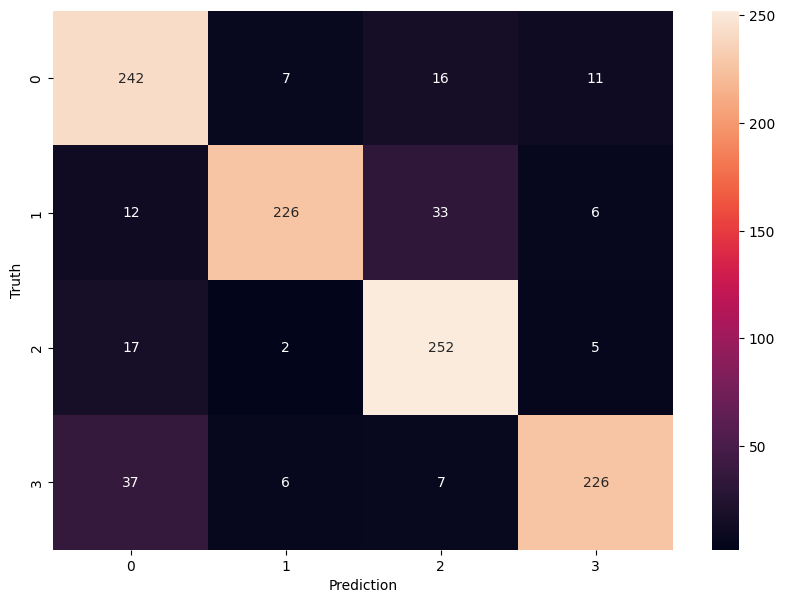

In [81]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True , fmt = 'd')
plt.xlabel('Prediction')
plt.ylabel('Truth')